### Probability Ratio Encoding
1. Probability of survived based on Cabin-- Categorical Features
2. Probability of not survived --1-pr(Survived)
3. pr(Survived)/pr(NOt Survived)
4. Dict to map Cabin with probability
5. replace with the categorical features

In [3]:
import pandas as pd
df = pd.read_csv('titanic_data.csv',usecols = ['cabin','survived'])
df.head()

,survived,cabin
0,1,B5
1,1,C22 C26
2,0,C22 C26
3,0,C22 C26
4,0,C22 C26


In [5]:
### Replacing
df['cabin'].fillna('Missing',inplace=True)
df.head(5)

,survived,cabin
0,1,B5
1,1,C22 C26
2,0,C22 C26
3,0,C22 C26
4,0,C22 C26


In [6]:
df['cabin'].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', 'Missing', 'C62 C64',
       'B35', 'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49',
       'C99', 'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10',
       'B4', 'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31',
       'E8', 'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D

In [7]:
### Getting first character of each unique values in cabin column
df['cabin']=df['cabin'].astype(str).str[0]
df.head()

,survived,cabin
0,1,B
1,1,C
2,0,C
3,0,C
4,0,C


In [8]:
df.cabin.unique()

array(['B', 'C', 'E', 'D', 'A', 'M', 'T', 'F', 'G'], dtype=object)

In [11]:
prob_df = df.groupby(['cabin'])['survived'].mean()

In [12]:
prob_df = pd.DataFrame(prob_df)
prob_df

,survived
cabin,
A,0.500000
B,0.723077
C,0.606383
D,0.695652
E,0.731707
F,0.619048
G,0.600000
M,0.302761
T,0.000000


In [13]:
prob_df['died'] = 1-prob_df['survived']
prob_df.head()

,survived,died
cabin,,
A,0.500000,0.500000
B,0.723077,0.276923
C,0.606383,0.393617
D,0.695652,0.304348
E,0.731707,0.268293


In [16]:
prob_df['probability_ratio']=prob_df['survived']/prob_df['died']
prob_df.head()

,survived,died,probability_ratio
cabin,,,
A,0.500000,0.500000,1.000000
B,0.723077,0.276923,2.611111
C,0.606383,0.393617,1.540541
D,0.695652,0.304348,2.285714
E,0.731707,0.268293,2.727273


In [24]:
rob_encoding=prob_df['probability_ratio'].to_dict()

In [22]:
df['cabin_encoding']=df['cabin'].map(prob_encoding)
df.head()

,survived,cabin,cabin_encoding
0,1,B,2.611111
1,1,C,1.540541
2,0,C,1.540541
3,0,C,1.540541
4,0,C,1.540541


### Transformation of Features

# Types of Transformation
1. Normalization And standardization
2. Scaling to minimum and Maximum Values
3. scaling to median and Quantiles
4. Guassian Transformation                                    
   Logarithmic Transformation                               
   Reciporical Transformation                                  
   Square Root transformation                              
   Exponential Transformation                                  
   Box Cox Transformation                                        

# Standardization
we try to bring all the variable or features to a similar scale. standarisation means centering the variable at zero Z=(x-x_mean)/std

In [27]:
import pandas as pd
df = pd.read_csv('titanic_data.csv',usecols=['pclass','age','fare','survived'])
df.head()

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500


In [29]:
df['age'].fillna(df.age.median(),inplace=True)
df.isnull().sum()

pclass      0
survived    0
age         0
fare        1
dtype: int64

In [31]:
df['fare'].fillna(df.fare.median(),inplace=True)
df.isnull().sum()

pclass      0
survived    0
age         0
fare        0
dtype: int64

In [34]:
#### Standarisation: we use the StandardScalar from sklearn library
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
### Fit vs Fit_transform
df_scaled = scaler.fit_transform(df)

In [37]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-1.546098,1.272006,-0.039005,3.442584
1,-1.546098,1.272006,-2.215952,2.286639
2,-1.546098,-0.786160,-2.131977,2.286639
3,-1.546098,-0.786160,0.038512,2.286639
4,-1.546098,-0.786160,-0.349075,2.286639
...,...,...,...,...
1304,0.841916,-0.786160,-1.163009,-0.364003
1305,0.841916,-0.786160,-0.116523,-0.364003
1306,0.841916,-0.786160,-0.232799,-0.503774
1307,0.841916,-0.786160,-0.194040,-0.503774


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([809.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 500.]),
 array([-0.78615963, -0.68325134, -0.58034304, -0.47743475, -0.37452645,
        -0.27161815, -0.16870986, -0.06580156,  0.03710673,  0.14001503,
         0.24292333,  0.34583162,  0.44873992,  0.55164822,  0.65455651,
         0.75746481,  0.8603731 ,  0.9632814 ,  1.0661897 ,  1.16909799,
         1.27200629]),
 <BarContainer object of 20 artists>)

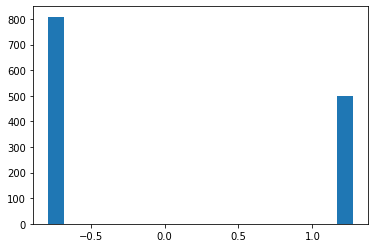

In [41]:
plt.hist(df_scaled[:,1],bins=20)

(array([828., 243., 102.,  52.,  17.,  25.,   4.,   0.,  18.,   3.,  13.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

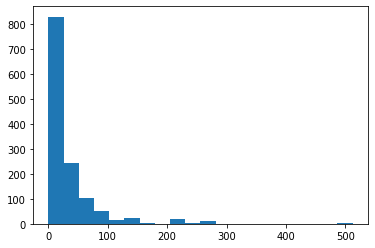

In [44]:
plt.hist(df['fare'],bins=20)

# Min Max Scaling (### CNN)---Deep Learning Technique
min max scaling scale the values between 0 to 1.             
X_scaled = (X-X-min/(X.max-X.min))                         

In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,pclass,survived,age,fare
0,0.0,1.0,0.361169,0.412503
1,0.0,1.0,0.009395,0.295806
2,0.0,0.0,0.022964,0.295806
3,0.0,0.0,0.373695,0.295806
4,0.0,0.0,0.311064,0.295806


(array([323.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 277.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 709.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

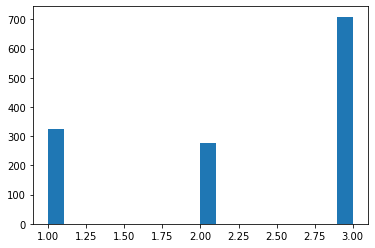

In [47]:
plt.hist(df['pclass'],bins=20)

(array([ 51.,  21.,  22.,  40., 114., 160., 391., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.1667  ,  4.158365,  8.15003 , 12.141695, 16.13336 , 20.125025,
        24.11669 , 28.108355, 32.10002 , 36.091685, 40.08335 , 44.075015,
        48.06668 , 52.058345, 56.05001 , 60.041675, 64.03334 , 68.025005,
        72.01667 , 76.008335, 80.      ]),
 <BarContainer object of 20 artists>)

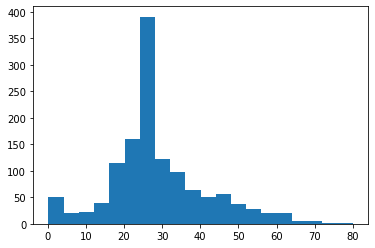

In [48]:
plt.hist(df['age'],bins=20)

# Robust Scaler
It is used to scale a features to median and Quantiles          
scaling using median and quantiles consist of substracting the median to all the observation and then dividing by the interquantile difference the interquantile diff is the diff between 75th and 25th quantile:

IOR = 75th quantile - 25th quantile

X_scaled = (X-X.median)/IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 percentile---10% of all values in this group is less then 1

In [49]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = scaler.fit_transform(df)
df_robust

array([[-2.        ,  1.        ,  0.07692308,  8.42130184],
       [-2.        ,  1.        , -2.08333077,  5.86400732],
       [-2.        ,  0.        , -2.        ,  5.86400732],
       ...,
       [ 0.        ,  0.        , -0.11538462, -0.30921503],
       [ 0.        ,  0.        , -0.07692308, -0.30921503],
       [ 0.        ,  0.        ,  0.07692308, -0.28141254]])

In [54]:
df_robust = pd.DataFrame(df_robust,columns=df.columns)

(array([ 51.,  21.,  22.,  40., 114., 160., 391., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([-2.14102308, -1.83397192, -1.52692077, -1.21986962, -0.91281846,
        -0.60576731, -0.29871615,  0.008335  ,  0.31538615,  0.62243731,
         0.92948846,  1.23653962,  1.54359077,  1.85064192,  2.15769308,
         2.46474423,  2.77179538,  3.07884654,  3.38589769,  3.69294885,
         4.        ]),
 <BarContainer object of 20 artists>)

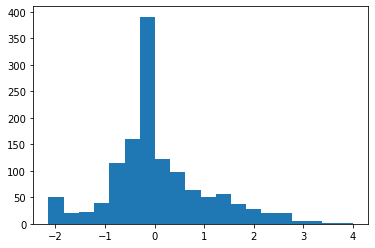

In [55]:
plt.hist(df['age'],bins=20)

# Guassian Transformation
Some machine learning algo like linear and  assume that the features are normally distributed they give us -Accuracy and -performance
  - Logarithmic Transformation
  - Reciporical Transformation
  - Square Root transformation
  - Exponential Transformation(more general you can use any exponent)
  - Box Cox Transformation

In [56]:
import pandas as pd
df = pd.read_csv('titanic_data.csv',usecols=['pclass','age','fare','survived'])
df.head()

,pclass,survived,age,fare
0,1,1,29.0000,211.3375
1,1,1,0.9167,151.5500
2,1,0,2.0000,151.5500
3,1,0,30.0000,151.5500
4,1,0,25.0000,151.5500


In [58]:
df['age'] = df['age'].fillna(df['age'].median())
df.isnull().sum()

pclass      0
survived    0
age         0
fare        1
dtype: int64

In [59]:
df['fare'] = df['fare'].fillna(df['fare'].median())
df.isnull().sum()

pclass      0
survived    0
age         0
fare        0
dtype: int64

In [61]:
import scipy.stats as stat
import pylab

In [66]:
## if you want to check whether features is guassion or normal distrubution
### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plot.show()

NameError: name 'plot' is not defined

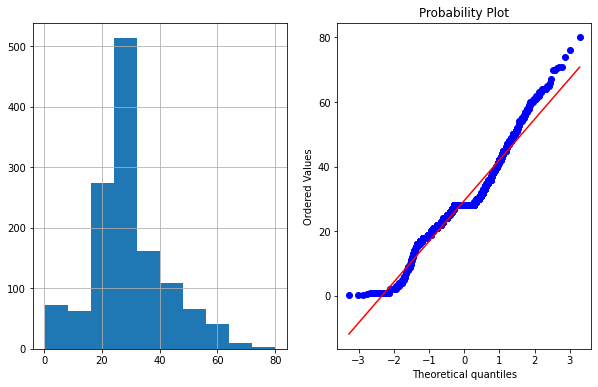

In [67]:
plot_data(df,'age')

#### If points are following with the line then it is called guassian distributive

# Logrithmic Transformation

NameError: name 'plot' is not defined

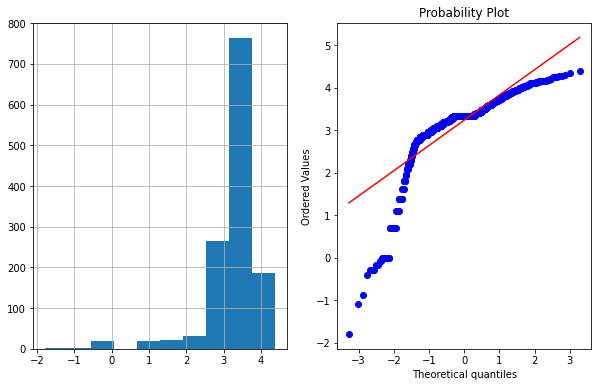

In [72]:
import numpy as np
df['age_log'] = np.log(df['age'])
plot_data(df,'age_log')

# Reciprocal Transformation

NameError: name 'plot' is not defined

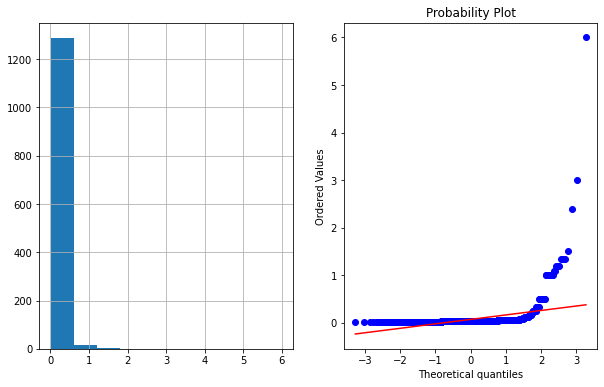

In [74]:
df['age_reciprocal'] = 1/df.age
plot_data(df,'age_reciprocal')

# Square root transformation

NameError: name 'plot' is not defined

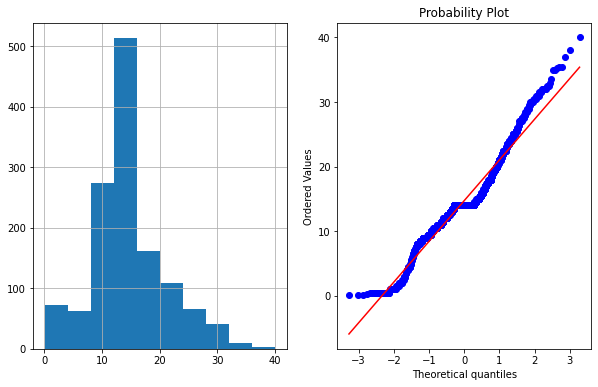

In [75]:
df['age_square'] = df.age*(1/2)
plot_data(df,'age_square')

# Exponential Transformation

NameError: name 'plot' is not defined

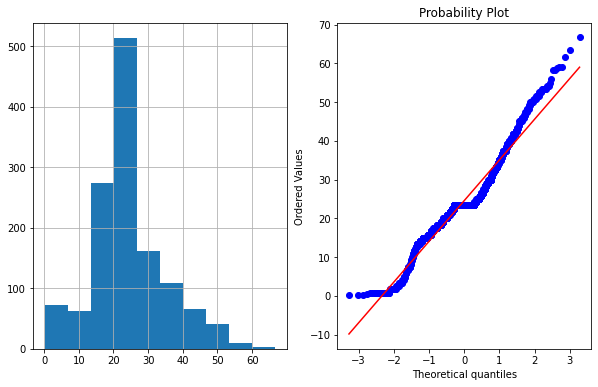

In [76]:
df['age_expo'] = df.age*(1/1.2)
plot_data(df,'age_expo')

#  BoxCox Transformation

T(Y) = (Y exp(lamda)-1/lamda

In [78]:
df['age_boxcox'],parameters=stat.boxcox(df['age'])

In [79]:
print(parameters)

0.7876768579226783


NameError: name 'plot' is not defined

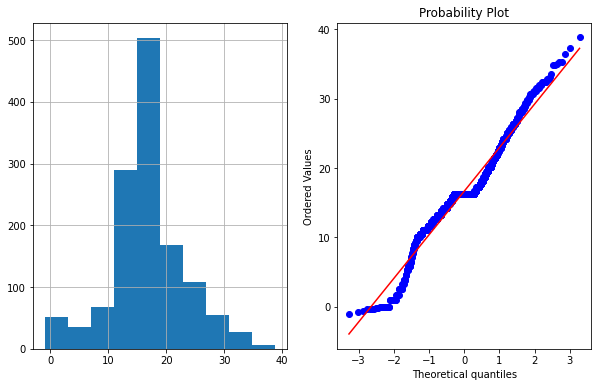

In [80]:
plot_data(df,'age_boxcox')

NameError: name 'plot' is not defined

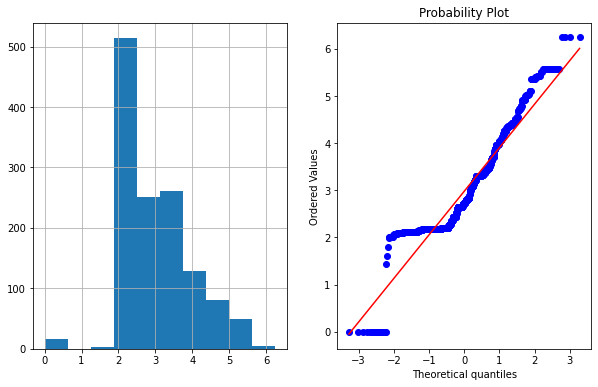

In [85]:
### Fare
df['fare_log'] = np.log1p(df['fare'])
plot_data(df,'fare_log')

NameError: name 'plot' is not defined

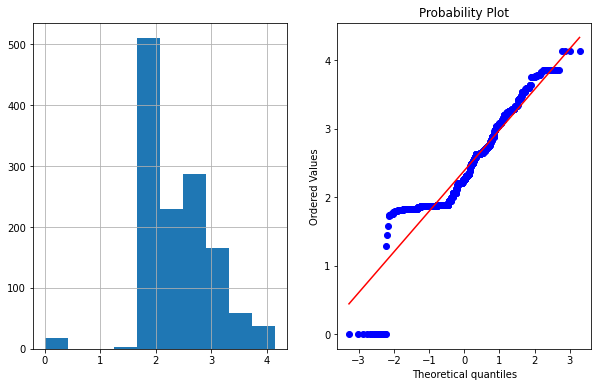

In [87]:
df['fare_boxcox'],parameters = stat.boxcox(df['fare']+1)
plot_data(df,'fare_boxcox')